![Marvel Logo](https://www.regmovies.com/static/dam/jcr:5914096c-fc7c-4fda-ace5-f46c1744faa7/MARVEL-title_Small.jpg)

# Project 3: Web APIs & Classification

## 2. Data Cleaning & EDA

In [66]:
# import libraries
!pip install matplotlib-venn
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2

from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline
plt.style.use('seaborn-darkgrid')

### Load data

In [2]:
# read in test & train csv
df1 = pd.read_csv('../data/shittysuperpowers.csv')
df2 = pd.read_csv('../data/godtiersuperpowers.csv')

In order to make sure the posts collected are all unique, I will check for duplicated for both datasets. If there is any duplicate post, I will drop them. 

In [3]:
# display df1 shittysuperpowers dataset

df1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,post_hint,preview,link_flair_template_id
0,NaN,shittysuperpowers,NaN,t2_6k7ehywh,False,NaN,0,False,You never forget to buy eggs at the grocery store,[],...,https://www.reddit.com/r/shittysuperpowers/com...,406953,1.601305e+09,0,NaN,False,NaN,NaN,NaN,NaN
1,NaN,shittysuperpowers,NaN,t2_3mr4ydvf,False,NaN,0,False,You can assemble any object from atoms by the ...,[],...,https://www.reddit.com/r/shittysuperpowers/com...,406953,1.601301e+09,0,NaN,False,NaN,NaN,NaN,NaN
2,NaN,shittysuperpowers,NaN,t2_3dbj9gpi,False,NaN,0,False,You have small visions of a person who is visu...,[],...,https://www.reddit.com/r/shittysuperpowers/com...,406953,1.601299e+09,0,NaN,False,NaN,NaN,NaN,NaN
3,NaN,shittysuperpowers,NaN,t2_4ku4ofh1,False,NaN,0,False,"Every time you sneeze, a random ant in a 50 me...",[],...,https://www.reddit.com/r/shittysuperpowers/com...,406953,1.601299e+09,0,NaN,False,NaN,NaN,NaN,NaN
4,NaN,shittysuperpowers,NaN,t2_2vizqa9u,False,NaN,0,False,Everytime you ring a bell an angel gets their ...,[],...,https://www.reddit.com/r/shittysuperpowers/com...,406953,1.601299e+09,0,NaN,False,NaN,NaN,NaN,NaN


In [4]:
df1.shape

(999, 108)

In [5]:
df1['title'].value_counts()

You are invincible also you will be fully aware of your own breathing for ever.       1
You can play air instruments that only you can hear                                   1
You get an ceiling fan everytime you snap, EVERYTIME!                                 1
You can squeeze out hairs like popping pimples                                        1
You can go invisible only while no one is looking or can see you                      1
                                                                                     ..
You literally shit money. Brand new, balled up bank notes come out of your bottom.    1
You have the power to sunbathe your eyes                                              1
You can walk on water only when you are walking backwards                             1
You can give orange arrows to random strangers to make him feel happy                 1
You can make yourself 10% more likely to be struck by lightning.                      1
Name: title, Length: 999, dtype:

In [6]:
# check for duplicate posts

df1.duplicated(subset=["title"]).sum()

0

In [7]:
# display df2

df2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,NaN,godtiersuperpowers,Inspired by r/Oofdit321,t2_4oreu9zn,False,NaN,0,False,When you say “breakdown breakdown” whoever you...,[],...,NaN,/r/godtiersuperpowers/comments/j1dfkt/when_you...,all_ads,False,https://www.reddit.com/r/godtiersuperpowers/co...,351384,1.601305e+09,0,NaN,False
1,NaN,godtiersuperpowers,NaN,t2_2pu8jvmd,False,NaN,0,False,You can think about work and it will be done w...,[],...,NaN,/r/godtiersuperpowers/comments/j1cvt6/you_can_...,all_ads,False,https://www.reddit.com/r/godtiersuperpowers/co...,351384,1.601303e+09,0,NaN,False
2,NaN,godtiersuperpowers,NaN,t2_9m7z7,False,NaN,0,False,"You no longer require sleep. However, you are ...",[],...,NaN,/r/godtiersuperpowers/comments/j1bybg/you_no_l...,all_ads,False,https://www.reddit.com/r/godtiersuperpowers/co...,351384,1.601300e+09,0,NaN,False
3,NaN,godtiersuperpowers,NaN,t2_35otf9vi,False,NaN,0,False,This one goes out to my fellow anxiety people....,[],...,NaN,/r/godtiersuperpowers/comments/j1bc8x/this_one...,all_ads,False,https://www.reddit.com/r/godtiersuperpowers/co...,351384,1.601297e+09,0,NaN,False
4,NaN,godtiersuperpowers,NaN,t2_5svy1s43,False,NaN,0,False,You can learn any language by kissing a speake...,[],...,NaN,/r/godtiersuperpowers/comments/j1b697/you_can_...,all_ads,False,https://www.reddit.com/r/godtiersuperpowers/co...,351384,1.601297e+09,0,NaN,False


In [8]:
df2.shape

(997, 104)

In [9]:
df2['title'].value_counts()

Your unused spare change will be turned into £1 coins or $1 bills                                                                                                 3
You can the cat                                                                                                                                                   2
You have the ability to manipulate probability                                                                                                                    2
You can reverse anything                                                                                                                                          2
You can enter into any PG or PG13 movie character at any point in their movie.                                                                                    1
                                                                                                                                                                 ..
Whenever you eat

In [10]:
# check for duplicate posts

df2.duplicated(subset=["title"]).sum()

5

In [11]:
# drop duplicated posts

df2.drop_duplicates(subset=['title'], keep='last', inplace=True) # drop duplicated topics

In [12]:
df2.shape

(992, 104)

### Feature Selection

Most of the fields in datasets are irrelevant to identifying if the posts are shitty or godtier superpowers. 

Target fields are: 

- subreddit: subreddit
- author: author_fullname
- selftext: selftext
- title: title
- number of comments: num_comments
- upvotes: ups
- created date: created_utc

In [13]:
# df1: feature selection

subreddit = df1['subreddit']
author = df1['author_fullname']
title = df1['title']
selftext = df1['selftext']
created_date = df1['created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
number_of_comments = df1['num_comments']
upvotes = df1['ups']

In [14]:
# create a new dataframe with target fields

shitty_df = pd.DataFrame([subreddit, author, title, selftext, created_date, number_of_comments, upvotes], index=['subreddit', 'author','title','selftext', 'created_date', 'number_of_comments', 'upvotes'])
shitty_df = shitty_df.T

In [15]:
shitty_df.head()

,subreddit,author,title,selftext,created_date,number_of_comments,upvotes
0,shittysuperpowers,t2_6k7ehywh,You never forget to buy eggs at the grocery store,NaN,2020-09-28 14:54:35,0,1
1,shittysuperpowers,t2_3mr4ydvf,You can assemble any object from atoms by the ...,NaN,2020-09-28 13:46:00,2,7
2,shittysuperpowers,t2_3dbj9gpi,You have small visions of a person who is visu...,NaN,2020-09-28 13:21:37,0,4
3,shittysuperpowers,t2_4ku4ofh1,"Every time you sneeze, a random ant in a 50 me...",NaN,2020-09-28 13:20:13,1,5
4,shittysuperpowers,t2_2vizqa9u,Everytime you ring a bell an angel gets their ...,NaN,2020-09-28 13:12:35,0,7


In [16]:
# df2: feature selection

subreddit = df2['subreddit']
author = df2['author_fullname']
title = df2['title']
selftext = df2['selftext']
created_date = df2['created_utc'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
number_of_comments = df2['num_comments']
upvotes = df2['ups']


In [17]:
# create a new dataframe with target fields

godtier_df = pd.DataFrame([subreddit, author, title, selftext, created_date, number_of_comments, upvotes], index=['subreddit', 'author','title','selftext', 'created_date', 'number_of_comments', 'upvotes'])
godtier_df = godtier_df.T


In [18]:
godtier_df.head()

,subreddit,author,title,selftext,created_date,number_of_comments,upvotes
0,godtiersuperpowers,t2_4oreu9zn,When you say “breakdown breakdown” whoever you...,Inspired by r/Oofdit321,2020-09-28 14:52:31,0,2
1,godtiersuperpowers,t2_2pu8jvmd,You can think about work and it will be done w...,NaN,2020-09-28 14:21:19,1,4
2,godtiersuperpowers,t2_9m7z7,"You no longer require sleep. However, you are ...",NaN,2020-09-28 13:26:25,3,46
3,godtiersuperpowers,t2_35otf9vi,This one goes out to my fellow anxiety people....,NaN,2020-09-28 12:47:38,0,9
4,godtiersuperpowers,t2_5svy1s43,You can learn any language by kissing a speake...,NaN,2020-09-28 12:36:37,4,4


In [19]:
# check for nulls

shitty_df.isnull().sum()

subreddit               0
author                  0
title                   0
selftext              755
created_date            0
number_of_comments      0
upvotes                 0
dtype: int64

In [20]:
# check for nulls

godtier_df.isnull().sum()

subreddit               0
author                  1
title                   0
selftext              648
created_date            0
number_of_comments      0
upvotes                 0
dtype: int64

Since in both shitty_df and godtier_df datasets column 'selftext' contains a lot of NaN values, I will fill the missing value with space first. After that, I will combine column 'title' and 'selftext', as selftext is extra information or elaboration on a post.

In [21]:
shitty_df['selftext'].fillna(' ', inplace=True)

In [22]:
godtier_df['selftext'].fillna(' ', inplace=True)

In [23]:
shitty_df['post'] = shitty_df['title'].astype(str) + ' ' + shitty_df['selftext'].astype(str)

In [24]:
godtier_df['post'] = godtier_df['title'].astype(str) + ' ' + godtier_df['selftext'].astype(str)

In [25]:
shitty_df.head()

,subreddit,author,title,selftext,created_date,number_of_comments,upvotes,post
0,shittysuperpowers,t2_6k7ehywh,You never forget to buy eggs at the grocery store,,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...
1,shittysuperpowers,t2_3mr4ydvf,You can assemble any object from atoms by the ...,,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...
2,shittysuperpowers,t2_3dbj9gpi,You have small visions of a person who is visu...,,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...
3,shittysuperpowers,t2_4ku4ofh1,"Every time you sneeze, a random ant in a 50 me...",,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me..."
4,shittysuperpowers,t2_2vizqa9u,Everytime you ring a bell an angel gets their ...,,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...


In [26]:
godtier_df.head()

,subreddit,author,title,selftext,created_date,number_of_comments,upvotes,post
0,godtiersuperpowers,t2_4oreu9zn,When you say “breakdown breakdown” whoever you...,Inspired by r/Oofdit321,2020-09-28 14:52:31,0,2,When you say “breakdown breakdown” whoever you...
1,godtiersuperpowers,t2_2pu8jvmd,You can think about work and it will be done w...,,2020-09-28 14:21:19,1,4,You can think about work and it will be done w...
2,godtiersuperpowers,t2_9m7z7,"You no longer require sleep. However, you are ...",,2020-09-28 13:26:25,3,46,"You no longer require sleep. However, you are ..."
3,godtiersuperpowers,t2_35otf9vi,This one goes out to my fellow anxiety people....,,2020-09-28 12:47:38,0,9,This one goes out to my fellow anxiety people....
4,godtiersuperpowers,t2_5svy1s43,You can learn any language by kissing a speake...,,2020-09-28 12:36:37,4,4,You can learn any language by kissing a speake...


Since i have combined 'title' and 'selftext' to a new column body, I will drop these 2 columns in both datasets. 

In [27]:
shitty_df.drop(columns=['title', 'selftext'], axis=1, inplace=True)

In [28]:
godtier_df.drop(columns=['title', 'selftext'], axis=1, inplace=True)

In [29]:
shitty_df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post
0,shittysuperpowers,t2_6k7ehywh,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...
1,shittysuperpowers,t2_3mr4ydvf,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...
2,shittysuperpowers,t2_3dbj9gpi,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...
3,shittysuperpowers,t2_4ku4ofh1,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me..."
4,shittysuperpowers,t2_2vizqa9u,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...


In [30]:
godtier_df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post
0,godtiersuperpowers,t2_4oreu9zn,2020-09-28 14:52:31,0,2,When you say “breakdown breakdown” whoever you...
1,godtiersuperpowers,t2_2pu8jvmd,2020-09-28 14:21:19,1,4,You can think about work and it will be done w...
2,godtiersuperpowers,t2_9m7z7,2020-09-28 13:26:25,3,46,"You no longer require sleep. However, you are ..."
3,godtiersuperpowers,t2_35otf9vi,2020-09-28 12:47:38,0,9,This one goes out to my fellow anxiety people....
4,godtiersuperpowers,t2_5svy1s43,2020-09-28 12:36:37,4,4,You can learn any language by kissing a speake...


In [31]:
pd.DataFrame(shitty_df).to_csv('../data/shitty_df.csv')
pd.DataFrame(godtier_df).to_csv('../data/godtier_df.csv')

### Data Exploration

In [32]:
shitty_df = pd.read_csv('../data/shitty_df.csv')
godtier_df = pd.read_csv('../data/godtier_df.csv')

shitty_df.drop('Unnamed: 0', axis=1, inplace=True)
godtier_df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
shitty_df.shape

(999, 6)

In [34]:
shitty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subreddit           999 non-null    object
 1   author              999 non-null    object
 2   created_date        999 non-null    object
 3   number_of_comments  999 non-null    int64 
 4   upvotes             999 non-null    int64 
 5   post                999 non-null    object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [35]:
shitty_df.describe()

,number_of_comments,upvotes
count,999.000000,999.000000
mean,5.961962,119.518519
std,23.838816,834.641115
min,0.000000,0.000000
25%,1.000000,7.000000
50%,2.000000,12.000000
75%,5.000000,21.000000
max,391.000000,10578.000000


999 uniqie posts are collected from shittysuperpowers subreddit. The average number comments each post is 5.9 words, and average upvotes is 119.5. 

In [36]:
godtier_df.shape

(992, 6)

In [37]:
godtier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subreddit           992 non-null    object
 1   author              991 non-null    object
 2   created_date        992 non-null    object
 3   number_of_comments  992 non-null    int64 
 4   upvotes             992 non-null    int64 
 5   post                992 non-null    object
dtypes: int64(2), object(4)
memory usage: 46.6+ KB


In [38]:
godtier_df.describe()

,number_of_comments,upvotes
count,992.000000,992.000000
mean,9.799395,296.849798
std,48.099723,1685.903175
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,11.000000
75%,5.000000,21.000000
max,837.000000,13927.000000


992 uniqie posts are collected from godtiersuperpowers subreddit. The average number comments each post is 9.7 words, and average upvotes is 296.8. 

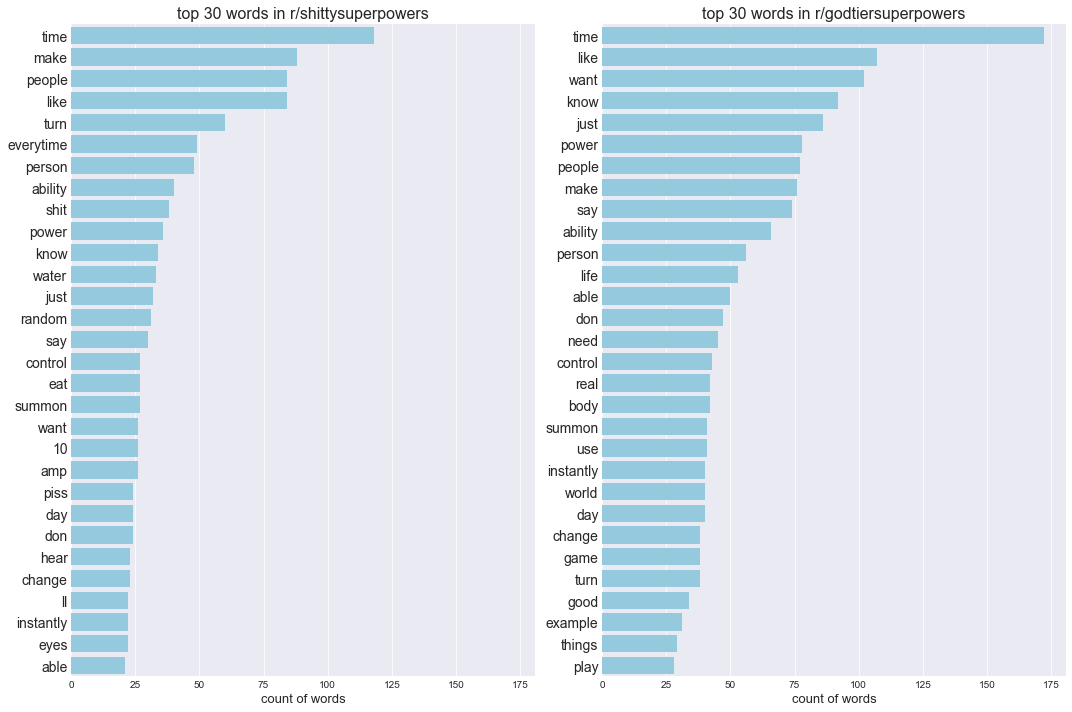

In [39]:
cvec = CountVectorizer(stop_words='english')

# top 30 words with the highest count in shitty_df
cvec.fit(shitty_df['post'])
len_features = len(cvec.get_feature_names())
shitty_df_cv = pd.DataFrame(cvec.transform(shitty_df['post']).todense(),columns=cvec.get_feature_names())
top_shitty = shitty_df_cv.sum(axis=0).sort_values(ascending=False).head(30)

# top 30 words with the highest count in godtier_df
cvec.fit(godtier_df['post'])
len_features = len(cvec.get_feature_names())
godtier_df_cv = pd.DataFrame(cvec.transform(godtier_df['post']).todense(),columns=cvec.get_feature_names())
top_godtier = godtier_df_cv.sum(axis=0).sort_values(ascending = False).head(30)


# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=top_shitty.index.values, x = top_shitty,color='skyblue',ax=ax[0])
ax[0].set_title('top 30 words in r/shittysuperpowers',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=top_godtier.index.values, x = top_godtier,color='skyblue',ax=ax[1])
ax[1].set_title('top 30 words in r/godtiersuperpowers',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

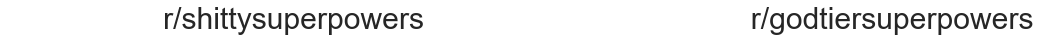

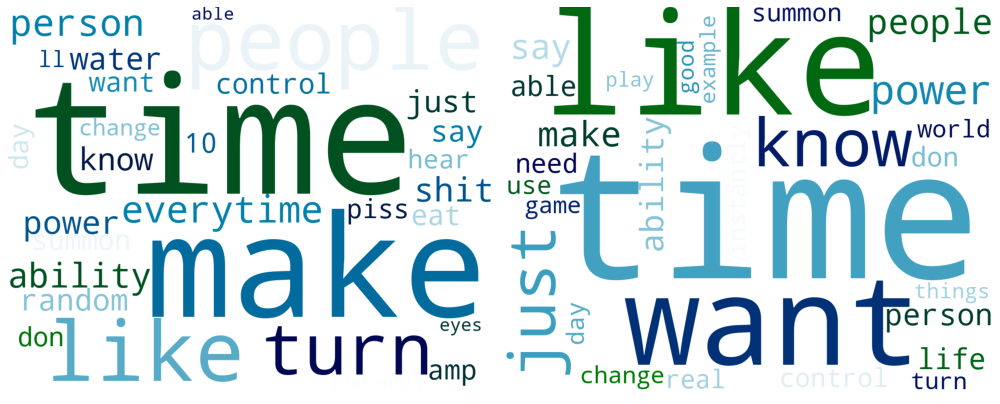

In [40]:
# set up WordCloud
wc_shitty = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='ocean').generate_from_frequencies(top_shitty) 

wc_godtier = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='ocean').generate_from_frequencies(top_godtier) 

plt.figure(figsize=(8, 0.3))
plt.text(x = 0.35,                              
         y = 0.9,                             
         s = 'r/shittysuperpowers                                       r/godtiersuperpowers', 
         ha = 'left',                        
         va = 'center',                       
         size = 30)                         
plt.axis('off')

# plot the WordCloud image 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].imshow(wc_shitty)
ax[0].axis('off')
ax[1].imshow(wc_godtier)
ax[1].axis('off')
plt.tight_layout()

In [41]:
# print top words in shitty_df

cvec = CountVectorizer(stop_words='english')
cvec.fit(shitty_df['post'])

len_features = len(cvec.get_feature_names())
print(len_features)

shitty_df_cv = pd.DataFrame(cvec.transform(shitty_df['post']).todense(),columns=cvec.get_feature_names())

top_shitty = shitty_df_cv.sum(axis=0)
top_shitty.sort_values(ascending = False).head(20)

2967


time         118
make          88
people        84
like          84
turn          60
everytime     49
person        48
ability       40
shit          38
power         36
know          34
water         33
just          32
random        31
say           30
control       27
eat           27
summon        27
want          26
10            26
dtype: int64

In [42]:
# print top words in godtier_df

cvec = CountVectorizer(stop_words='english')
cvec.fit(godtier_df['post'])

len_features = len(cvec.get_feature_names())
print(len_features)

godtier_df_cv = pd.DataFrame(cvec.transform(godtier_df['post']).todense(),columns=cvec.get_feature_names())

top_godtier = godtier_df_cv.sum(axis=0)
top_godtier.sort_values(ascending = False).head(20)

3695


time       172
like       107
want       102
know        92
just        86
power       78
people      77
make        76
say         74
ability     66
person      56
life        53
able        50
don         47
need        45
control     43
real        42
body        42
summon      41
use         41
dtype: int64

In [43]:
# get top words in shitty_df

df_top_shitty = top_shitty.to_frame(name='count')
df_top_shitty['word'] = df_top_shitty.index
df_top_shitty.reset_index(drop=True, inplace=True)
df_top_shitty['freq'] = df_top_shitty['count'] / len(df_top_shitty) * 100

cols = ['word','count','freq']
df_top_shitty = df_top_shitty[cols]
df_top_shitty.sort_values(by='count',ascending=False, inplace=True)
df_top_shitty.head(10)

,word,count,freq
2635,time,118,3.977081
1536,make,88,2.965959
1470,like,84,2.831143
1846,people,84,2.831143
2714,turn,60,2.022245
861,everytime,49,1.651500
1860,person,48,1.617796
60,ability,40,1.348163
2255,shit,38,1.280755
1961,power,36,1.213347


In [44]:
# get top words in godtier_tf

df_top_godtier = top_godtier.to_frame(name='count')
df_top_godtier['word'] = df_top_godtier.index
df_top_godtier.reset_index(drop=True, inplace=True)
df_top_godtier['freq'] = df_top_godtier['count'] / len(df_top_godtier) * 100

cols = ['word','count','freq']
df_top_godtier = df_top_godtier[cols]
df_top_godtier.sort_values(by='count',ascending=False, inplace=True)
df_top_godtier.head(10)

,word,count,freq
3335,time,172,4.654939
1908,like,107,2.895805
3562,want,102,2.760487
1830,know,92,2.489851
1798,just,86,2.327470
2498,power,78,2.110961
2361,people,77,2.083897
2002,make,76,2.056834
2806,say,74,2.002706
58,ability,66,1.786198


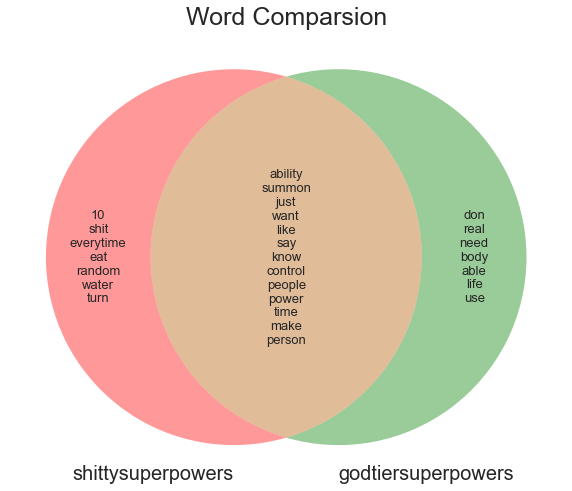

In [45]:
# get duplicated words in both shitty and godtier

plt.figure(figsize=(10,10))
plt.title('Word Comparsion',fontsize=25)

set_a = set(df_top_shitty['word'][:20])
set_b = set(df_top_godtier['word'][:20])

venn = venn2([set_a,set_b],set_labels=['shittysuperpowers','godtiersuperpowers'])

venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

venn.get_label_by_id('A').set_size(20)
venn.get_label_by_id('B').set_size(20)
venn.get_label_by_id('100').set_size(13)
venn.get_label_by_id('110').set_size(13)
venn.get_label_by_id('010').set_size(13)

In [46]:
# combine two subreddits into one dataframe

df = pd.concat([shitty_df, godtier_df])

In [47]:
df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post
0,shittysuperpowers,t2_6k7ehywh,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...
1,shittysuperpowers,t2_3mr4ydvf,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...
2,shittysuperpowers,t2_3dbj9gpi,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...
3,shittysuperpowers,t2_4ku4ofh1,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me..."
4,shittysuperpowers,t2_2vizqa9u,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...


In [48]:
df.shape

(1991, 6)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 991
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subreddit           1991 non-null   object
 1   author              1990 non-null   object
 2   created_date        1991 non-null   object
 3   number_of_comments  1991 non-null   int64 
 4   upvotes             1991 non-null   int64 
 5   post                1991 non-null   object
dtypes: int64(2), object(4)
memory usage: 108.9+ KB


In [50]:
# check for nulls

df.isnull().sum()

subreddit             0
author                1
created_date          0
number_of_comments    0
upvotes               0
post                  0
dtype: int64

In [51]:
# find nulls

df[df.isna().any(axis=1)]

,subreddit,author,created_date,number_of_comments,upvotes,post
701,godtiersuperpowers,NaN,2020-09-14 21:48:16,3,14,You can erase anything you want. But you have ...


In [52]:
# drop null

df.dropna(axis=0, inplace=True)

In [53]:
df.isnull().sum().sum()

0

In [54]:
df.shape

(1990, 6)

In [55]:
df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post
0,shittysuperpowers,t2_6k7ehywh,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...
1,shittysuperpowers,t2_3mr4ydvf,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...
2,shittysuperpowers,t2_3dbj9gpi,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...
3,shittysuperpowers,t2_4ku4ofh1,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me..."
4,shittysuperpowers,t2_2vizqa9u,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...


### Feature Engineering

In [56]:
# Create 'target' for classification
df['target'] = df['subreddit'].map({'shittysuperpowers': 1, 'godtiersuperpowers': 0})

In [57]:
df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post,target
0,shittysuperpowers,t2_6k7ehywh,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...,1
1,shittysuperpowers,t2_3mr4ydvf,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...,1
2,shittysuperpowers,t2_3dbj9gpi,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...,1
3,shittysuperpowers,t2_4ku4ofh1,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me...",1
4,shittysuperpowers,t2_2vizqa9u,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...,1


In [58]:
df['subreddit'].value_counts()

shittysuperpowers     999
godtiersuperpowers    991
Name: subreddit, dtype: int64

## Exploratory Data Analysis

In [59]:
df.describe()

,number_of_comments,upvotes,target
count,1990.000000,1990.000000,1990.000000
mean,7.876382,207.969849,0.502010
std,37.967595,1331.736651,0.500122
min,0.000000,0.000000,0.000000
25%,1.000000,6.000000,0.000000
50%,2.000000,12.000000,1.000000
75%,5.000000,21.000000,1.000000
max,837.000000,13927.000000,1.000000


### Create Distribution Plot for Numerical Variables

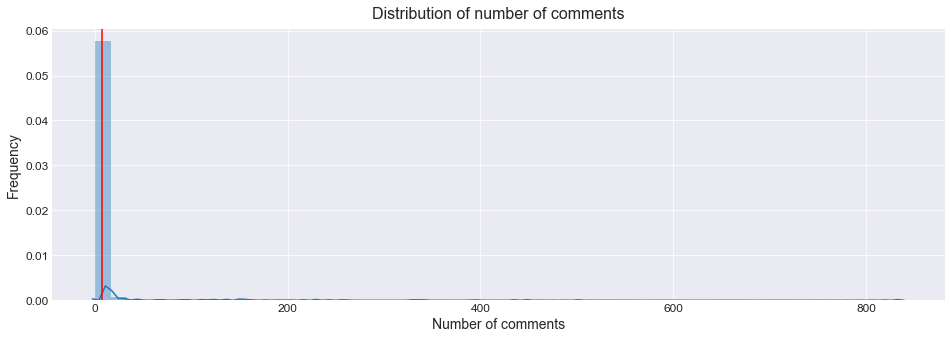

In [60]:
# Create distribution plot for number of comments
plt.figure(figsize=(16,5))
plt.title('Distribution of number of comments', size=16, pad=10)

sns.distplot(df['number_of_comments'])
plt.axvline(df['number_of_comments'].mean(), color='r', )

plt.xlabel('Number of comments', size=14)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

The average number comments each post is 7.9 words. The distrubution mainaly focus on near average number. No outliers identified.

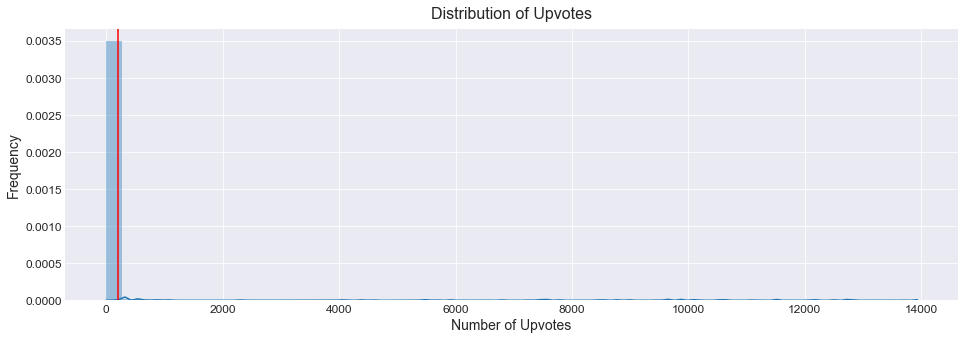

In [61]:
# Create distribution plot for Distribution of Upvotes
plt.figure(figsize=(16,5))
plt.title('Distribution of Upvotes', size=16, pad=10)

sns.distplot(df['upvotes'])
plt.axvline(df['upvotes'].mean(), color='r', )

plt.xlabel('Number of Upvotes', size=14)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

The average number of upvotes each post is 208 upvotes. The distrubution mainaly focus on near average number. No outliers identified.

After the Exploratory Data Analysis, we have learned that this is no conclusive information from the charts above and the features are irrelavent. Hence, we can drop these columns.

In [62]:
df.head()

,subreddit,author,created_date,number_of_comments,upvotes,post,target
0,shittysuperpowers,t2_6k7ehywh,2020-09-28 14:54:35,0,1,You never forget to buy eggs at the grocery st...,1
1,shittysuperpowers,t2_3mr4ydvf,2020-09-28 13:46:00,2,7,You can assemble any object from atoms by the ...,1
2,shittysuperpowers,t2_3dbj9gpi,2020-09-28 13:21:37,0,4,You have small visions of a person who is visu...,1
3,shittysuperpowers,t2_4ku4ofh1,2020-09-28 13:20:13,1,5,"Every time you sneeze, a random ant in a 50 me...",1
4,shittysuperpowers,t2_2vizqa9u,2020-09-28 13:12:35,0,7,Everytime you ring a bell an angel gets their ...,1


In [63]:
df.drop(columns=['subreddit', 'author', 'created_date', 'number_of_comments', 'upvotes'], axis=1, inplace=True)

In [64]:
df.head()

,post,target
0,You never forget to buy eggs at the grocery st...,1
1,You can assemble any object from atoms by the ...,1
2,You have small visions of a person who is visu...,1
3,"Every time you sneeze, a random ant in a 50 me...",1
4,Everytime you ring a bell an angel gets their ...,1


In [65]:
pd.DataFrame(df).to_csv('../data/df_clean.csv')